In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Get the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Split into x and y
array = dataframe.values
X = array[:,0:-1]
Y = array[:,-1]

/Users/user/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


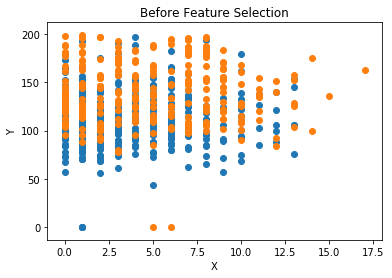

In [35]:
X_set, y_set = X, Y
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1])
plt.title('Before Feature Selection')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [36]:
# Select top 4 from Chi-squared 
# (fit - only for scoring, to filter top 4, need to transform)
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)

In [37]:
np.set_printoptions(precision=3)
rank_df = pd.DataFrame(fit.scores_)
rank_df["Features"] = dataframe.columns[:-1]
rank_df.columns = ["Score", "Features"]
rank_df = rank_df.sort_values("Score",ascending=False)
rank_df

,Score,Features
4,2175.565273,test
1,1411.887041,plas
7,181.303689,age
5,127.669343,mass
0,111.519691,preg
3,53.108040,skin
2,17.605373,pres
6,5.392682,pedi


In [38]:
# Filter to top 4
X_filtered = fit.transform(X)

/Users/user/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


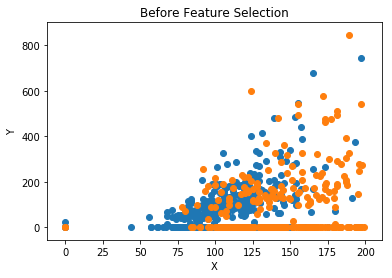

In [39]:
X_set, y_set = X_filtered, Y
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1])
plt.title('Before Feature Selection')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

/Users/user/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


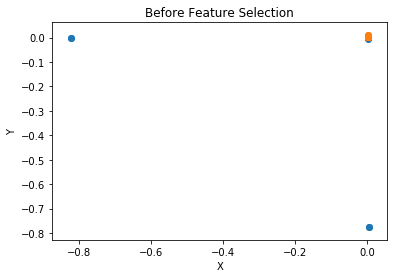

In [42]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Feature Scaling : must be apply when doing dimensionality reductions
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = KernelPCA(n_components=3, kernel="rbf")
X_filtered = pca.fit_transform(X)

X_set, y_set = X_filtered, Y
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1])
plt.title('Before Feature Selection')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()